# EDA



Анализ данных из датасета train.csv

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('data/train.csv')

data.info()


data.iloc[:,1:11].describe()#.loc[['mean', 'std', '50%', 'min', 'max']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000


Данный датасет представляет собой данные об участах леса, содержащий следующую информацию:
0: Id - Номер участка 
1: Elevation - Высота над уровнем моря в метрах
2: Aspect - Направление в градусах по азимуту
3: Slope - Уклон в градусах
4: Horizontal_Distance_To_Hydrology - Горизонтальное расстояние до ближайших объектов поверхностных вод
5: Vertical_Distance_To_Hydrology - Расстояние до ближайших объектов с поверхностными водоемами
6: Horizontal_Distance_To_Roadways - Расстояние от горы до ближайшей проезжей части
7 - 9: Hillshade - Индекс затенения холмов в (9 утра, полдень, 3 часа дня) в день летнего солнцестояния
10: Horizontal_Distance_To_Fire_Points - Расстояние от горы до ближайших точек возгорания
11 - 14: Wilderness_Area - обозначение дикой местности (0 = отсутствие или 1 = наличие).
15 - 54: Soil_Type - Обозначение типа почвы(0 = отсутствие или 1 = наличие).
55: Cover_Type - Обозначение типа лесного покрова(7 типов, целые числа от 1 до 7).

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('data/train.csv')

In [ ]:
sns.boxplot(data = df, x = 'Cover_Type', y = 'Horizontal_Distance_To_Hydrology')
plt.show()

In [ ]:

data_ = data

a = []
for i in range(len(data)):
    for x in range(1, 5):
        if data["Wilderness_Area" + str(x)][i]:
            a.append(x)

for x in range(1, 5):
    data_ = data_.drop("Wilderness_Area" + str(x), axis=1)

data_['Wilderness_Area'] = a

a.clear()
for i in range(len(data)):
    for x in range(1, 41):
        if data["Soil_Type" + str(x)][i]:
            a.append(x)

for x in range(1, 41):
    data_ = data_.drop("Soil_Type" + str(x), axis=1)

data_['Soil_Type'] = a

data_.iloc[:100,1:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Cover_Type                          15120 non-null  int64
 12  Wild

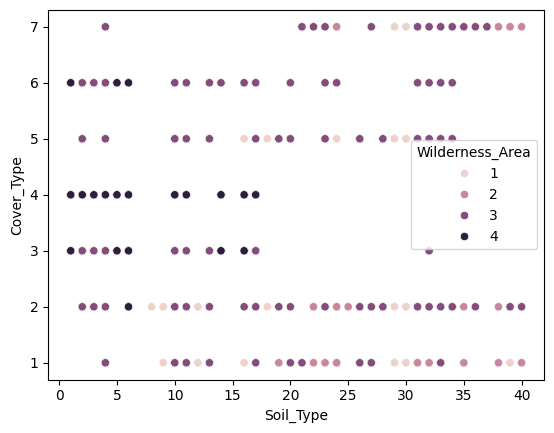

In [90]:
sns.scatterplot(data = data_, x = 'Soil_Type', y = 'Cover_Type', hue='Wilderness_Area')
plt.show()

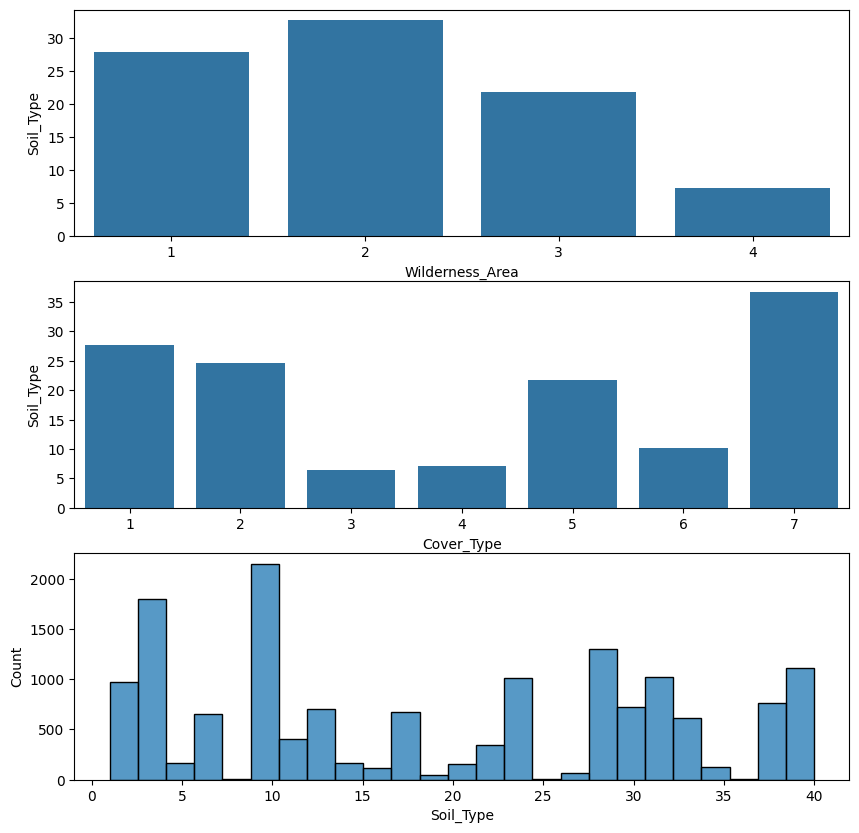

In [125]:
fig, axs = plt.subplots(3, 1, figsize=(10,10))
sns.barplot(data=data_, x='Wilderness_Area',y='Soil_Type', errorbar=None,ax=axs[0])

sns.barplot(data=data_, x='Cover_Type', y='Soil_Type', errorbar=None,ax=axs[1])
sns.histplot(data=data_, x='Soil_Type',ax=axs[2])

plt.show()

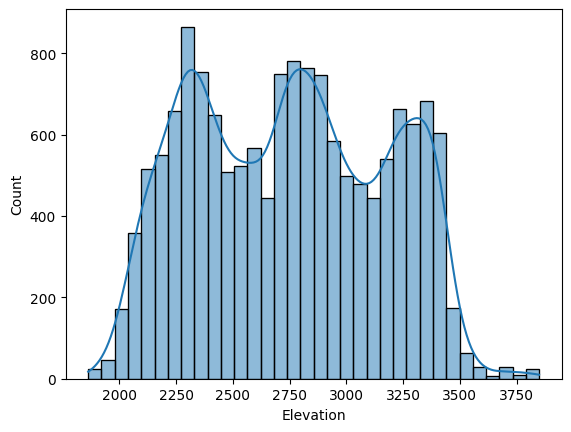

In [126]:
sns.histplot(data=data_, x='Elevation',kde=True)
plt.show()

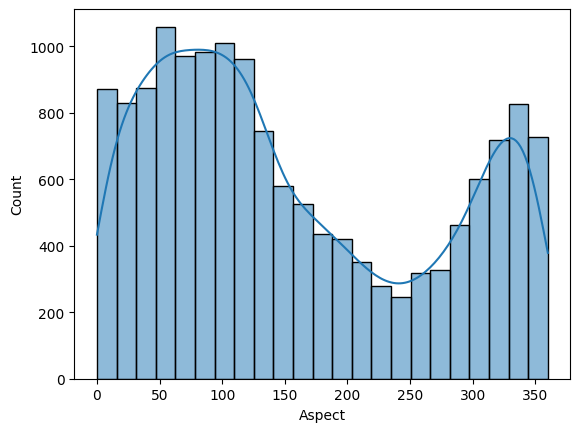

In [128]:
sns.histplot(data=data_, x='Aspect', kde=True)
plt.show()

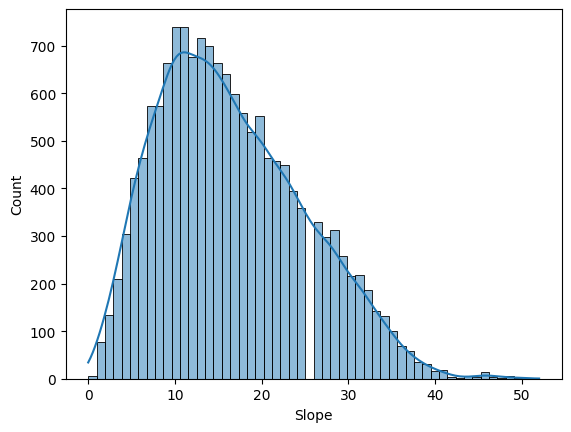

In [131]:
sns.histplot(data=data_, x='Slope', kde=True)
plt.show()